Source:
*   https://www.youtube.com/watch?v=jXShvxPcRl4
*   https://www.cs.cmu.edu/~quake-papers/painless-conjugate-gradient.pdf

If we want to solve a linear equation
$$A \vec{x} = \vec{b}$$
we, can do it by finding minima of following quadratic form:
$$f(\vec{x}) = \frac{1}{2} \vec{x}^T A \vec{x} - \vec{b}^T\vec{x}$$
Why? How? First we have to find a gradient $\nabla_{\vec{x}} \ f(\vec{x})$.

Gradient will tell us where local/global minima is $\nabla_{\vec{x}} \ f(\vec{x}) = \vec{0}$ and direction to that minima.

_Note: using this method we can examine only cases where A is symmetric and positive definite._

This means that objective function $f(\vec{x})$ forms a paraboloid. Positive definite-ness implies that paraboloid does not have saddle points - coefficients for quadratic terms are larger than for mixed terms.
In this case It is enough to find 'first derivative' for this 'cup' shape function, since there is __either__ minimum ar maximum.


We want to find $m$-th component of a gradient $\rightarrow \frac{\delta f}{\delta{x_m}}$
$$f(\vec{x}) = \frac{1}{2}\sum_j x_j \bigg[\sum_i A_{ij} x_i\bigg] - \sum_k b_k x_k$$
$$\frac{\partial f}{\partial{x_m}} = \frac{1}{2} \bigg( \sum_j  \frac{\partial x_j}{\partial{x_m}} \bigg[\sum_i A_{ij} x_i\bigg] + \sum_j x_j \bigg[\sum_i A_{ij} \frac{\partial x_i}{\partial{x_m}}\bigg]\bigg) - \sum_k b_k \frac{\partial x_k}{\partial{x_m}}$$
$\frac{\partial x_a}{\partial{x_b}}$ mimics a (Kronecker) delta function $\delta^a_b$. In matrix expression we view it as an identity matrix $I$.  
Note: partial derivatives are "orthogonal" $(\frac{\partial x}{\partial{y}} = \frac{\partial y}{\partial{x}} = 0; \frac{\partial x}{\partial{x}} = \frac{\partial y}{\partial{y}} = 1)$
$$A = AI$$
$$(AI)_{jm} = \sum_i A_{ji} \delta^i_m $$
$$= A_{j0} \underbrace{\delta^0_m}_{0} + \dots  + A_{jm} \underbrace{\delta^m_m}_{1} + \dots$$
$$= 0+ \dots + A_{jm} + \dots =  A_{jm}$$
$$\boxed{\sum_i A_{ji} \delta^i_m =  A_{jm}}$$

Multiplication by $\delta^i_m$ here simply removes summation $\sum_i$ and replaces index $i \leftrightarrow m$. 

Same with vectors (extract m-th component):
$$\boxed{\sum_k b_k \delta^k_m = b_m}$$

We rewrite our gradient component expression
$$\frac{\partial f}{\partial{x_m}} = \frac{1}{2} \bigg( \sum_j  \delta^j_m \underbrace{\bigg[\sum_i A_{ij} x_i\bigg]}_{\text{vector's j-th component}} + \sum_j x_j \bigg[\sum_i A_{ij} \delta^i_m\bigg]\bigg) - \sum_k b_k \delta^k_m$$
$$\frac{\partial f}{\partial{x_m}} = \frac{1}{2} \bigg( \sum_i A_{im} x_i + \sum_j x_j A_{mj}\bigg) -  b_m$$

Rename indices and combine terms:
$$\frac{\partial f}{\partial{x_m}} = \frac{1}{2} \sum_i (A_{im} + A_{mi}) \ x_i  -  b_m$$
which implies that
$$\nabla_{\vec{x}} \ f(\vec{x})  = \frac{1}{2} (A + A^T) \ \vec{x} - \vec{b}$$

if matrix $A$ is symmetric $A^T = A$, then
$$\nabla_{\vec{x}} \ f(\vec{x})  = A \vec{x} - \vec{b}$$
so a point $\vec{x}^*$ where gradient of $f$ is zero,
$$\nabla_{\vec{x}} \ f(\vec{x})\bigg|_{\vec{x}=\vec{x}^*}  = A\vec{x}^* - \vec{b} = \vec{0}$$
<u>satisfies our initial problem</u>
$$ A\vec{x}^*= \vec{b}$$

***
## (Optional) Using Einstein summation:

Using this approach we raise and lower indices with metric tensor, swap indices using Kronecker delta function.

By default we assume that we use contravariant vector components (with indices on top).

_Note: in cartesian coordinate system there is no difference between co- and contra- variant components. We just make our life harder. But its good for practice._

*   Summation is made over diagonal indices;
*   Double indices imply summation.
$$ \vec{x} = \sum_i x^i \vec{e}_i = x^i \vec{e}_i$$
$$A \vec{x} = \vec{b} \rightarrow A^{\cdot j}_{i \cdot} x^i = b^j$$

$$ f = \frac{1}{2} x_j A^{\cdot j}_{i \cdot} x^i - b_i x^i$$
_Arguably one can write $f$ as_
$$ f = \frac{1}{2} x^i A_{ij} x^j - b_i x^i$$
_which makes taking derivative of $x^i A_{ij} x^j$ easier, but we still cant escape covariant components in $b_i x^i$ and $A_{ij}$._

We write gradient using Einstein summation  as
$$\frac{\partial f}{\partial{x^m}} =  \frac{1}{2}\frac{\partial x_j}{\partial{x^m}}A^{\cdot j}_{i \cdot} x^i +  \frac{1}{2}x_j A^{\cdot j}_{i \cdot} \frac{\partial x^i}{\partial{x^m}} - b_k \frac{\partial x^k}{\partial{x^m}}$$

$$\frac{\partial x^i}{\partial{x^m}} = \delta^i_m$$
We can raise and lower indices using metric tensor
$$x_j = g_{jk}x^k $$
$$g_{jk}g^{km} = \delta^m_j$$
Using metric tensor we can derive derivative of a covariant component w.r.t contravariant variable
$$\frac{\partial x_j}{\partial{x^m}} = \frac{\partial g_{jk}x^k}{\partial{x^m}} = g_{jk} \frac{\partial x^k}{\partial{x^m}} = g_{jk} \delta^k_m = g_{jm}$$
_here we rename $g_{jk}$, not lower index of $\delta^k_m$. But these should be closely related via $g_{jk}g^{km} = \delta^m_j$._

This leaves us with
$$\frac{\partial f(\vec{x})}{\partial{x^m}} =  \frac{1}{2}g_{jm} A^{\cdot j}_{i \cdot} x^i +  \frac{1}{2}x_j A^{\cdot j}_{i \cdot} \delta^i_m - b_k \delta^k_m$$
$$ =  \frac{1}{2}A_{i m} x^i +  \frac{1}{2}x_j A^{\cdot j}_{m \cdot} - b_m$$
$$ =  \frac{1}{2}A_{i m} x^i + \frac{1}{2}g_{js} x^s A^{\cdot j}_{m \cdot} - b_m$$
$$ =  \frac{1}{2}A_{i m} x^i + \frac{1}{2}A_{m s} x^s - b_m$$

By changing indices and gathering terms we see that
$$\frac{\partial f}{\partial{x^m}} =  \frac{1}{2}(A_{i m} +  A_{m i}) \ x^i - b_m$$

With same results as previously. 

_I dont know why it leaves us with covariant components though xd. In Cartesian C.S there is not difference between two._

***
## Gradient Descent
We know that gradient of a function points into direction of increasing function value.

Lets remind us of expression for a gradient:
$$\nabla_{\vec{x}} \ f(\vec{x})  = A \vec{x} - \vec{b}$$
Since we want to find minimum of $f(\vec{x})$, we have to explore a trajectory in space of $\vec{x}$, which will follow steepest descent, until it reaches global/local minimum.

This means that we perform a gradient descent iterations:
$$\vec{x}_{t+1} = \vec{x}_t - \alpha \nabla_{\vec{x}} \ f(\vec{x})$$

We can loop back onto our original problem and define residual
$$\vec{r} = \vec{b} - A \vec{x}$$
and use it to replace a gradient
$$\nabla_{\vec{x}} \ f(\vec{x}) = - \vec{r}$$
so we can rewrite gradient descent only in terms of original problem

$$\vec{x}_{t+1} = \vec{x}_t + \alpha \vec{r}$$

## Line search

What is the optimal 'step' length? For quadratic functions we have a simple and intuitive solution.

Gradient $\nabla_{\vec{x}} \ f(\vec{x})$ only shows local 'steepness', if we follow this direction, its not guaranteed that we will reach __global__ minima. 

From initial search point, we are traveling along a line 
$$\vec{l}(\alpha) = \vec{x} + \alpha \vec{r}$$
This line cuts paraboloid (objective function). When objective function is evaluated at each point along a line, it forms some sort of skewed parabola, which also has its own minima. 

<u>Reaching line's minima guarantees some improvement over our initial state.</u>

### How do we find a minima along the line?

Expression 
$$g(\alpha) = f(\vec{l}(\alpha)) = f(\vec{x} + \alpha \vec{r})$$
can be viewed as a function parameterized by $\alpha$, and its minimum can be found by calculating $\alpha^*$ at which 
$$\frac{\partial g(\alpha)}{\partial \alpha}\bigg|_{\alpha = \alpha^*} = 0$$

We can use a chain rule:
$$\frac{\partial g(\alpha)}{\partial \alpha} = \frac{\partial f(\vec{l})}{\partial \vec{l}}\cdot\frac{\partial \vec{l}}{\partial \alpha} = \nabla \ f\cdot \vec{r}$$
Now, we can evaluate this expression at parameter $\alpha^*$ associated with line minima at ${\vec{l} = \vec{x}+\alpha^*\vec{r}}$

$$0 = \big[\underbrace{A(\vec{x}+\alpha^*\vec{r}) - \vec{b}}_{\nabla f(\vec{l}) = A\vec{l} - \vec{b}}\big] \cdot \vec{r} $$
$$0= \bigg[\underbrace{A\vec{x}- \vec{b}}_{-\vec{r}}+\alpha^*A\vec{r} \bigg] \cdot \vec{r} $$
$$0= \bigg[\alpha^*A\vec{r}-\vec{r} \bigg] \cdot \vec{r} $$

$$\alpha^*(A\vec{r})\cdot \vec{r} =\vec{r} \cdot \vec{r}$$

$$\alpha^* = \frac{\vec{r} \cdot \vec{r}}{(A\vec{r})\cdot \vec{r}} = \frac{\vec{r}^T\vec{r}}{ \vec{r}^TA\vec{r}}$$

Comparing to our initial starting points its guaranteed improvement (or equal)

Upon reaching this new point we can recalculate gradient and continue descent.

for i-th iteration:

1. $$\vec{r}_i = \vec{b} - A \vec{x}_i$$
1. $$\alpha_i = \frac{\vec{r}^T_i\vec{r}_i}{ \vec{r}^T_iA\vec{r}_i}$$
1. $$\vec{x}_{i+1} = \vec{x}_i + \alpha_i \vec{r}_i$$

Or this can be expressed as one equation by applying $(-A [\cdot] +\vec{b})$ to 3rd equation:

$$\underbrace{-A\vec{x}_{i+1}+\vec{b}}_{\vec{r}_{i+1}}= \underbrace{-A \vec{x}_i  + \vec{b}}_{\vec{r}_i} - \alpha_i A \vec{r}_i$$
and we get replacement for 3.:

4. $$\boxed{\vec{r}_{i+1} = \vec{r}_i - \alpha_i A \vec{r}_i}$$
with $A\vec{r}_i$ being used twice (in 2. and 4.) and also $\vec{r}_0$ should be calculated once via 1.

## Implementation

[[0.02764923 0.02370837]] [[-1.5  1.5]]
i:1, residual :8.98601
i:2, residual :2.79000
i:3, residual :0.57769
i:4, residual :0.17936
i:5, residual :0.03714
i:6, residual :0.01153
i:7, residual :0.00239
i:8, residual :0.00074


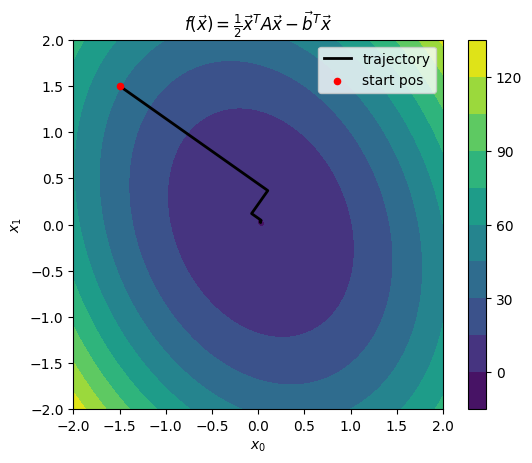

In [128]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(69)

N = 2
A = np.random.rand(N,N)*10
A += np.diag(np.random.rand(N)*50)  # force large quadratic terms
B = np.random.rand(N,1)*10

T = lambda x: np.moveaxis(x, -1, -2)    # transpose for array of dims (*shape, 2,1)

def f(x):
    return (0.5*T(x) @ A @ x - T(B) @ x)

x_true = np.linalg.inv(A) @ B
x0 = np.array([[-1.5,1.5]]).T
print(x_true.T, x0.T)
r_old = B - A @ x0
N_samples = 200
dom = (-2,2)
dom1 = np.linspace(*dom, N_samples)
X,Y = XY = np.meshgrid(dom1,dom1)
domain_xy = np.stack(XY, axis = -1)[...,None]
obj_fn = f(domain_xy).reshape(N_samples,N_samples)
c = plt.contourf(X,Y, obj_fn, extent = [*dom*2],levels = 10)
plt.gca().set_aspect(1)
plt.colorbar(c)

r = B - A @ x0
i = 0
rs = []
alphas = []
r_norm =  np.linalg.norm(r)
while r_norm> 0.001:
    rs.append(r.copy())
    Ar = A @ r
    alpha = (np.dot(r.T,r)/np.dot(r.T,Ar))[0,0]
    alphas.append(alpha.copy())
    r -= alpha*Ar
    i += 1
    r_norm =  np.linalg.norm(r)
    print(f'i:{i}, residual :{r_norm:0.5f}')

rs_a    = np.array(rs).squeeze(-1)
alphas_a = np.array(alphas).reshape(-1,1)
displ = np.vstack(([0,0],np.cumsum(rs_a*alphas_a, axis = 0)))

traj = x0.reshape(1,-1) + displ
np.array(rs).shape

plt.plot(*traj.T, color = 'k', lw = 2, label = 'trajectory')
plt.scatter(*x0, c = 'r', s = 20, zorder = 2, label = 'start pos')
plt.xlabel(r'$x_0$')
plt.ylabel(r'$x_1$')
plt.title(r'$f(\vec{x}) = \frac{1}{2} \vec{x}^T A \vec{x} - \vec{b}^T\vec{x}$')
plt.legend();

## Convergence of steepest descent


error term shows how farm we are from solution $\vec{x}$
$$\boxed{\vec{e}_i = \vec{x}_i - \vec{x}}$$
$$A \vec{e}_i = A \vec{x}_i - A \vec{x}$$
$$ = A \vec{x}_i - \vec{b} = - \vec{r}_i $$

$$\boxed{\vec{r}_i = - A \vec{e}_i }$$

if we expand error in terms of eigenvectors
$$A \vec{v}_i = \lambda_i \vec{v}_i$$
eigenvectors are orthogonal (we also want them orthonormal)
$$\vec{v}_i^T \vec{v}_j = \delta^i_j$$

$$\vec{e}_i = \sum_j \xi_j \vec{v}_j$$
Any vector-vector multiplications will go though orthogonality aspect
$$||\vec{e}_i ||^2 = \sum_i \xi_i  \vec{v}_i^T \sum_j \xi_j  \vec{v}_j = \sum_i\sum_j \xi_i \xi_j (\underbrace{\vec{v}_i^T \vec{v}_j}_{\delta^i_j})$$

$$\boxed{||\vec{e}_i ||^2 = \sum_j \xi_j^2}$$

$$\vec{r}_i = - A \vec{e}_i  = - A \sum_j \xi_j \vec{v}_j $$
$$ = -  \sum_j \xi_j \underbrace{A \vec{v}_j}_{\lambda_j \vec{v}_j} = -  \sum_j \xi_j \lambda_j \vec{v}_j $$
$$\boxed{\vec{r}_i  =   -  \sum_j \xi_j \lambda_j \vec{v}_j}$$

$$\boxed{||\vec{r}_i ||^2 = \sum_i\sum_j \xi_i \xi_j \lambda_i \lambda_j(\underbrace{\vec{v}_i^T \vec{v}_j}_{\delta^i_j}) = \sum_j \xi_j^2 \lambda_j^2}$$
Conjugate norm (A-norm)
$$\vec{e}_i^T A \vec{e}_i = \sum_i \xi_i \vec{v}_i^T A \sum_j \xi_j \vec{v}_j^T $$
$$ = \sum_i \xi_i \vec{v}_i^T \sum_j \xi_j \lambda_j \vec{v}_j = \sum_i\sum_j \xi_i \xi_j \lambda_j (\underbrace{\vec{v}_i^T \vec{v}_j}_{\delta^i_j})$$
$$\boxed{\vec{e}_i^T A \vec{e}_i  = \sum_j \xi_j^2 \lambda_j }$$

Application of $A$ basically adds additional $\lambda$
$$\boxed{\vec{r}_i^T A \vec{r}_i = \sum_i\sum_j \xi_i \xi_j \lambda_j^2 (\underbrace{\vec{v}_i^T \vec{v}_j}_{\delta^i_j}) = \sum_j \xi_j^2 \lambda_j^3 }$$

Regular norms are just Pythagorean norms in rotated coordinate systems

Since 
$$$$
$$\vec{x}_{i+1} = \vec{x}_i + \alpha_i \vec{r}_i \overset{(\vec{e}_i = \vec{x}_i - \vec{x})}{\rightarrow} \vec{e}_{i+1} = \vec{e}_{i} + \alpha_i \vec{r}_i$$


If we consider case when residual is aligned (exactly) with eigenvector (only one component present)

$$\vec{r}_i = - A \vec{e}_i = - \lambda_e \vec{e}_i$$
then updater rule is
$$\vec{e}_{i+1} =  \vec{e}_i + \alpha_i \vec{r}_i = \vec{e}_i - \alpha_i  \lambda_e \vec{e}_i$$
and 
$$\alpha_i = \frac{\vec{r}^T_i\vec{r}_i}{ \vec{r}^T_iA\vec{r}_i} = \frac{\lambda_e^2 \vec{e}^T_i\vec{e}_i}{ \lambda_e^3 \vec{e}^T_i\vec{e}_i} = \frac{1}{\lambda_e}$$
$$\vec{e}_{i+1} =  \vec{e}_i-  \frac{1}{\lambda_e} \lambda_e \vec{e}_i = \vec{e}_i - \vec{e}_i = \vec{0} $$

Apparently this means instant convergence with step size $\frac{1}{\lambda_e}$. 

_I personally dont see how time step would be scaled if we were to scale  $\vec{r}_i = - A \beta_e \vec{e}_i = - \lambda_e \beta_e \vec{e}_i$._

_Looks like its a specific case with instant convergence when directions are aligned with eigenbasis._